# Gradient Descent: implementazione ed esecuzione su vari esempi

<table align="center">
<tr>
    <td>
<img src="img/gd_surface.png" width="100%">
    </td>
    <td>
<img src="img/gd_levels.png" width="45%">
    </td>
    </tr>
</table>

## Gradient Descent

$$ w^{(t+1)} = w^{(t)} - \eta \, \nabla g(w^{(t)}), \qquad t=1,2,\ldots,T $$

In questa esercitazione implementiamo l'algoritmo Gradient Descent in NumPy e lo applichiamo su vari semplici esempi di funzioni, sia convesse che non convesse. 

Iniziamo caricando NumPy (e MatPlotLib per i grafici).

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Esercizio 0: Completare l'implementazione di GD

La seguente funzione `gradient_descent` contiene una implementazione quasi completa dell'algoritmo, ma manca proprio del passo fondamentale di aggiornamento del vettore $w$. 

La funzione riceve in input:

* la funzione da minimizzare, $g: R^N \to R$
* la funzione gradiente, $\nabla g: R^N \to R^N$
* il passo $\eta > 0$
* il numero di iterazioni $T$
* il vettore iniziale $w^{(1)}$

La funzione restituisce due liste:

* `w_history` $ = [ w^{(1)}, w^{(2)}, \ldots, w^{(T)} ] $ è la sequenza dei vettori $w^{(t)}$ generati dall'algoritmo Gradient Descent
* `cost_history` $ = [ g(w^{(1)}), g(w^{(2)}), \ldots, g(w^{(T)}) ] $ è la sequenza dei corrispondenti valori $g(w^{(t)})$

Si studi il codice dell'algoritmo e, sulla base di quanto visto a lezione, lo si completi della riga mancante che effettua l'aggiornamento del vettore $w$. 

In [6]:
# Input: g (funzione obiettivo), nabla_g (funzione gradiente), 
# eta (passo), T (numero massimo di iterazioni), w_init (punto iniziale)
def gradient_descent(g, nabla_g, eta, T, w_init):
    w = w_init            # inizializzazione del vettore dei parametri w
    w_history = [w]       # lista contenente l'andamento storico dei parametri
    cost_history = [g(w)] # lista contenente i corrispondenti valori della funzione costo
    # Ciclo principale
    for t in range(T):
        # valutazione del gradiente
        grad_eval = nabla_g(w)
        # applicazione di un passo di discesa del gradiente
        ### INSERIRE QUI SOTTO LA RIGA DI CODICE CHE EFFETTUA L'AGGIORNAMENTO DEL VETTORE w 
        ### COME PREVISTO DALL'ALGORITMO
        w = w - eta*grad_eval
        ###
        # salvataggio di parametri e costo
        w_history.append(w)
        cost_history.append(g(w))
    # restituiamo l'intera evoluzione storica di parametri e costo
    return w_history, cost_history

Fare **doppio-clic qui** per la soluzione dell'esercizio. 

<!--
        # applicazione di un passo di discesa del gradiente
        w = w - eta*grad_eval
-->

Definiamo anche una funzione ausiliaria, usata per graficare l'andamento storico del costo del vettore $w$ negli esempi successivi. 

In [7]:
# Funzione che grafica l'andamento storico del costo
def plot_loss(cost_history):
    plt.figure()
    plt.xlabel("Epoca t")
    plt.ylabel("Costo g(w_t)")

    T = len(cost_history)
    plt.plot(np.arange(0, T), cost_history, label="g(w_t)")
    plt.legend()
    plt.ylim([np.min(cost_history) - 0.03*np.abs(np.min(cost_history)), np.max(cost_history)])
    plt.show()
    print('Ultimo valore di w: ', w_history[-1])
    print('Ultimo valore di g(w): ', cost_history[-1])

## Un esempio convesso: $g(w) = (w^4 + w^2 + 10w) / 50$

Cominciamo definendo la funzione da minimizzare e il suo gradiente (calcolato analiticamente "a mano"). 

In [8]:
def g1(w):
    return (w**4 + w**2 + 10*w) / 50

def nabla_g1(w):
    return (4*(w**3) + 2*w + 10) / 50

Si tratta di una funzione convessa: 

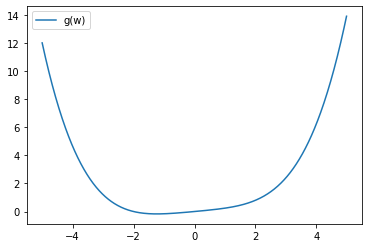

In [9]:
# Grafichiamo g(w)
plt.plot(np.arange(-5, 5, 0.01), g1(np.arange(-5, 5, 0.01)), label='g(w)');
plt.legend();

Per approssimare il punto di minimo globale della funzione, proviamo ad applicare GD per 1000 iterazioni con passo $\eta=0.001$ a partire dal punto $w_{init} = 2$. 

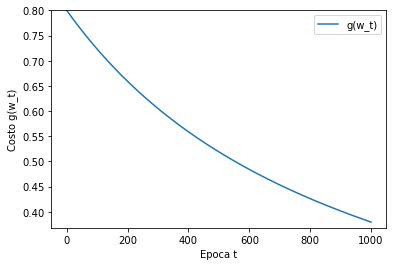

Ultimo valore di w:  [1.36448144]
Ultimo valore di g(w):  [0.37945918]


In [10]:
w_history, cost_history = gradient_descent(g1, nabla_g1, 0.001, 1000, np.array([2.0]))
plot_loss(cost_history)

## Esercizio 1

**Esercizio 1**. Eseguire Gradient Descent con $\eta = 1.0$, $\eta = 0.1$, $\eta = 0.01$ per 1000 iterazioni dal punto iniziale $w_{init} = 2$. Quale tra questi valori di $\eta$ funziona meglio per questa particolare funzione e punto iniziale? Cosa succede utilizzando invece $\eta= 10$? 

## Un esempio non convesso: $g(w) = \sin(3w) + 0.3 w^2$

In [ ]:
def g2(w):
    return np.sin(3*w) + 0.3 * w**2

def nabla_g2(w):
    return 3*np.cos(3*w) + 0.6 * w

In questo caso la funzione non è convessa e presenta più minimi locali: 

In [ ]:
# Grafichiamo g(w)
plt.plot(np.arange(-5, 5, 0.01), g2(np.arange(-5, 5, 0.01)), label='g(w)');
plt.legend();

Grafichiamo il costo ottenuto con $\eta = 0.05$, $T=10$ partendo da $w_{init} = -1.5$. 

In [ ]:
w_history, cost_history = gradient_descent(g2, nabla_g2, 0.05, 10, np.array([-1.5]))
plot_loss(cost_history)

## Esercizio 2

**Esercizio 2**. Graficare il costo ottenuto con $\eta = 0.05$, $T=10$ partendo da un altro punto iniziale: $w_{init} = 4.5$. Verificare che nonostante ci sia convergenza, il minimo locale raggiunto ha un diverso valore rispetto a quello ottenuto partendo da $-1.5$. 

## Un esempio multivariato: $g(w) = w_0^2 + w_1^2 + 2$

In questo ultimo esempio lo spazio ambiente $R^N$ è bidimensionale. 

Notare che ora la funzione gradiente (`nabla_g3`) deve restituire un vettore di lunghezza $2$ (basato sulle derivate parziali). 

In [ ]:
def g3(w):
    return w[0]**2 + w[1]**2 + 2

def nabla_g3(w):
    return np.array([2*w[0], 2*w[1]])

Nell'invocazione di `gradient_descent`, l'unica differenza sintattica è che ora il vettore di inizializzazione $w_{init}$ sarà un vettore di lunghezza $2$ anziché $1$. 

In [ ]:
w_history, cost_history = gradient_descent(g3, nabla_g3, 0.05, 50, np.array([1.8, 2.0]))
plot_loss(cost_history)

## Esercizio 3
**Esercizio 3**. Determinare (a meno di un errore $\pm 0.0001$) il valore di $w \in R$ che minimizza globalmente la funzione convessa $g(w) = 3w^2 + e^{-w}$. 